Bitcoin Price Analysis About the dataset:

The dataset consists of 23 variables.

Date : Date of observation btc_market_price : Average USD market price across major bitcoin exchanges.
btc_total_bitcoins : The total number of bitcoins that have already been mined. 
btc_market_cap : The total USD value of bitcoin supply in circulation. 
btc_trade_volume : The total USD value of trading volume on major bitcoin exchanges. 
btc_blocks_size : The total size of all block headers and transactions. 
btc_avg_block_size : The average block size in MB. 
btc_n_orphaned_blocks : The total number of blocks mined but ultimately not attached to the main Bitcoin blockchain. btc_n_transactions_per_block : The average number of transactions per block. 
btc_median_confirmation_time : The median time for a transaction to be accepted into a mined block. 
btc_hash_rate : The estimated number of tera hashes per second the Bitcoin network is performing. 
btc_difficulty : A relative measure of how difficult it is to find a new block. 
btc_miners_revenue : Total value of coinbase block rewards and transaction fees paid to miners. 
btc_transaction_fees : The total value of all transaction fees paid to miners. 
btc_cost_per_transaction_percent : miners revenue as percentage of the transaction volume. 
btc_cost_per_transaction : miners revenue divided by the number of transactions. 
btc_n_unique_addresses : The total number of unique addresses used on the Bitcoin blockchain. 
btc_n_transactions : The number of daily confirmed Bitcoin transactions. 
btc_n_transactions_total : Total number of transactions. 
btc_n_transactions_excluding_popular : The total number of Bitcoin transactions, excluding the 100 most popular addresses. btc_n_transactions_excluding_chains_longer_than_100 : The total number of Bitcoin transactions per day excluding long transaction chains. 
btc_output_volume : The total value of all transaction outputs per day. 
btc_estimated_transaction_volume : The total estimated value of transactions on the Bitcoin blockchain.

Exercise:

Ingest the data into a format that is easy for analysis.
Perform Exploratory Data Analysis on the dataset.
Predict the future price of the dataset.

Preparation:
For the preparations let's first import the necessary libraries and load the files needed for our Exploratory Data Analysis.
1. Try to load the dataset into a variable and view the data.

In [3]:
from matplotlib.offsetbox import AnchoredText
import numpy as np 
import pandas as pd 
import datetime as dt
import itertools
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

bitcoin_dataset = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv')
bitcoin_dataset.head()


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


Preprocessing is a necessary step in Data Mining and Prediction.
1. Now try to learn more about the dataset by finding out the size and relevant details using predefined functions. Note that data_frame is a dataframe and can't be accessed via slice terminology like data_frame[:, 3]. You must access via iloc or data_frame.values. 
2. We can find out the percentage of null values.
3. Now see if you have any null values in the dataset. If you do, try to fill them using relevant functions.

In [20]:
#Write the code to find the number of rows and columns in the dataset.
bitcoin_dataset.shape
data_frame = pd.DataFrame(bitcoin_dataset)
print(dataframe.iloc[0,:])
#You can use the info function to find the details of the entire dataset.
data_frame.info
#Check if you have any NULL values.
print(bitcoin_dataset.isnull().any())
#Find out the percentage of filled values.
for feature in bitcoin_dataset:
    content_prop = len(bitcoin_dataset[bitcoin_dataset[feature].notnull() == True].index)/len(bitcoin_dataset.index)
    print(feature, content_prop)
#Try to fill the NULL values.
bitcoin_dataset = bitcoin_dataset.fillna(method = 'ffill')



Date                                                     2/17/2010
btc_market_price                                                 0
btc_total_bitcoins                                      2.0432e+06
btc_market_cap                                                   0
btc_trade_volume                                                 0
btc_blocks_size                                                  0
btc_avg_block_size                                     0.000234776
btc_n_orphaned_blocks                                            0
btc_n_transactions_per_block                                     1
btc_median_confirmation_time                                     0
btc_hash_rate                                             2.92e-05
btc_difficulty                                             2.52774
btc_miners_revenue                                               0
btc_transaction_fees                                             0
btc_cost_per_transaction_percent                            31

<bound method DataFrame.info of            Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0     2/17/2010           0.00000           2043200.0    0.000000e+00   
1     2/18/2010           0.00000           2054650.0    0.000000e+00   
2     2/19/2010           0.00000           2063600.0    0.000000e+00   
3     2/20/2010           0.00000           2074700.0    0.000000e+00   
4     2/21/2010           0.00000           2085400.0    0.000000e+00   
5     2/22/2010           0.00000           2098150.0    0.000000e+00   
6     2/23/2010           0.00000           2110700.0    0.000000e+00   
7     2/24/2010           0.00000           2120200.0    0.000000e+00   
8     2/25/2010           0.00000           2127600.0    0.000000e+00   
9     2/26/2010           0.00000           2136100.0    0.000000e+00   
10    2/27/2010           0.00000           2144750.0    0.000000e+00   
11    2/28/2010           0.00000           2152850.0    0.000000e+00   
12     3/1/2010    

In [44]:
#Find out the percentage of filled values.
for feature in bitcoin_dataset:
    content_prop = len(bitcoin_dataset[bitcoin_dataset[feature].notnull() == True].index)/len(bitcoin_dataset.index)
    print(feature, content_prop)
#Try to fill the NULL values.
bitcoin_dataset = bitcoin_dataset.fillna(method = 'ffill')


Date 1.0
btc_market_price 1.0
btc_total_bitcoins 0.9907088781830695
btc_market_cap 1.0
btc_trade_volume 0.9927735719201651
btc_blocks_size 0.9900206469373709
btc_avg_block_size 1.0
btc_n_orphaned_blocks 1.0
btc_n_transactions_per_block 1.0
btc_median_confirmation_time 0.9958706125258087
btc_hash_rate 1.0
btc_difficulty 0.9944941500344116
btc_miners_revenue 1.0
btc_transaction_fees 0.9965588437715073
btc_cost_per_transaction_percent 1.0
btc_cost_per_transaction 1.0
btc_n_unique_addresses 1.0
btc_n_transactions 1.0
btc_n_transactions_total 1.0
btc_n_transactions_excluding_popular 1.0
btc_n_transactions_excluding_chains_longer_than_100 1.0
btc_output_volume 1.0
btc_estimated_transaction_volume 1.0
btc_estimated_transaction_volume_usd 1.0


Now lets have a look at how the bitcoin market price is distributed.
Try to plot the value of market price using matplotlib library.

count     2906.000000
mean       839.104218
std       2304.972497
min          0.000000
25%          6.653465
50%        235.130000
75%        594.191164
max      19498.683330
Name: btc_market_price, dtype: float64


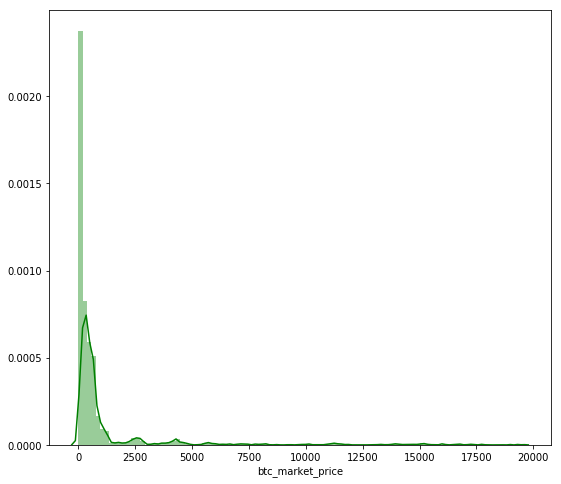

In [38]:
from matplotlib.offsetbox import AnchoredText
import numpy as np 
import pandas as pd 
import datetime as dt
import itertools
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

bitcoin_dataset = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv')
print(bitcoin_dataset['btc_market_price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(bitcoin_dataset['btc_market_price'], color='g', bins=100, hist_kws={'alpha': 0.4})

Numerical data distribution:
1. For this part lets look at the distribution of all of the features by ploting them.To do so lets first list all the types of our data from our dataset and take only the numerical ones.And then we'll write the code for plotting all the graphs.
2. Now we'll try to find which features are strongly correlated with Bitcoin Market Price(ie. By what percentage does each attribute affect the market price of bitcoin). We'll store them in a var called strong_list. We'll reuse dataset to do so.
3. we will now have a list of strongly correlated values after completing the first two steps, but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:
    -Plot the numerical features and see which ones have very few or explainable outliers
    -Remove the outliers from these features and see which one can have a good correlation without their outliers
    -Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the SalePrice.

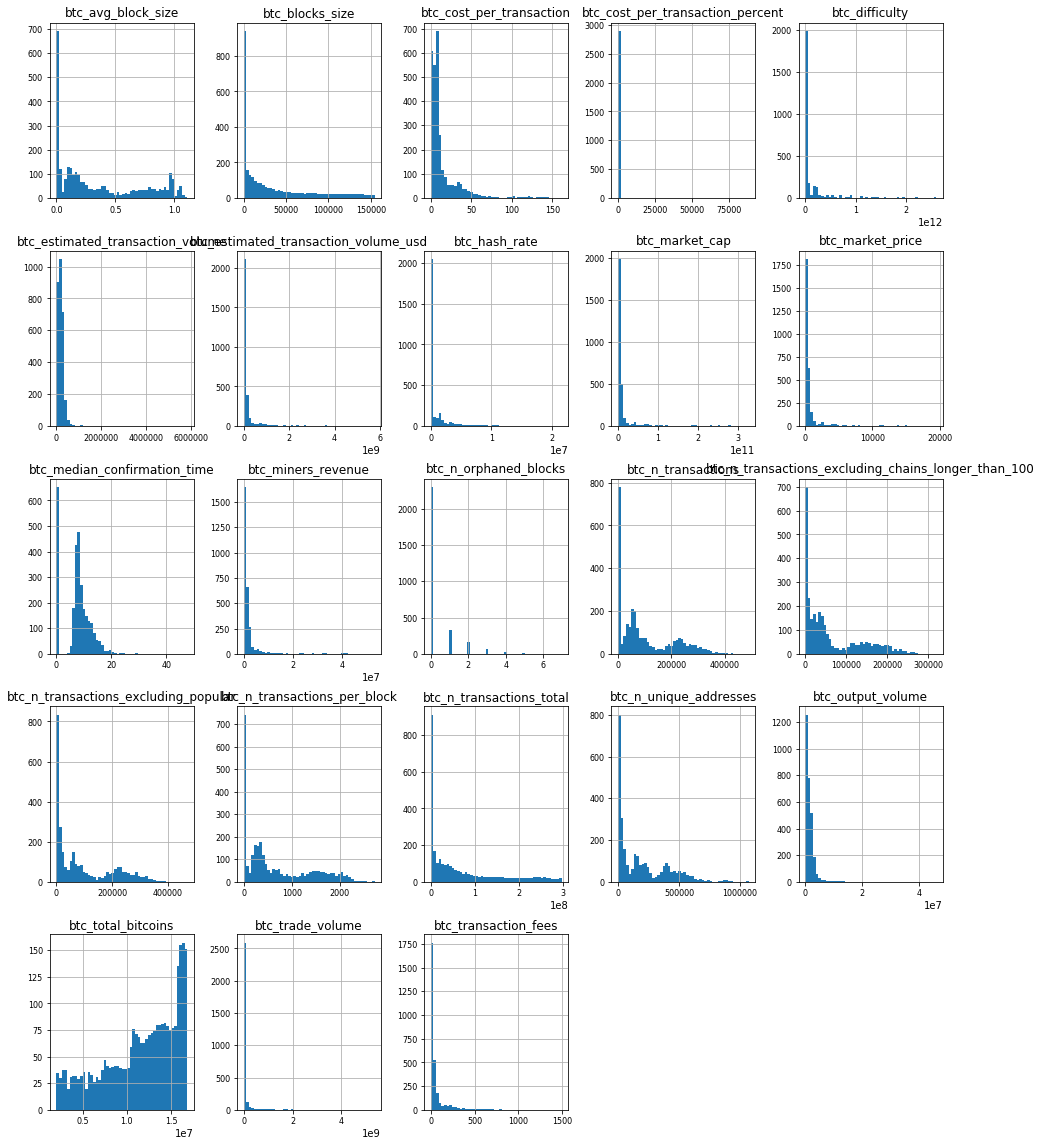

In [41]:
list(set(bitcoin_dataset.dtypes.tolist()))
#We have to include only float and int types for numerical data.
df_num = bitcoin_dataset.select_dtypes(include = ['float64', 'int64'])
df_num.head()
#Code for plotting of graphs.
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

There is 16 strongly correlated values with SalePrice:
btc_market_price                                       1.000000
btc_market_cap                                         0.999783
btc_miners_revenue                                     0.986732
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916937
btc_trade_volume                                       0.868813
btc_cost_per_transaction                               0.815507
btc_transaction_fees                                   0.806595
btc_n_transactions_total                               0.680048
btc_blocks_size                                        0.674507
btc_n_unique_addresses                                 0.663917
btc_n_transactions                                     0.569603
btc_n_transactions_excluding_chains_longer_than_100    0.567281
btc_n_transactions_excluding_popular                   0.558416
btc_n_transactions_per_block                     

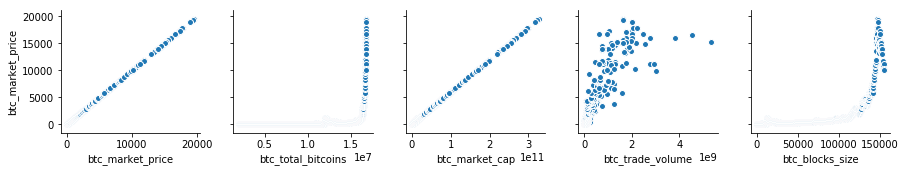

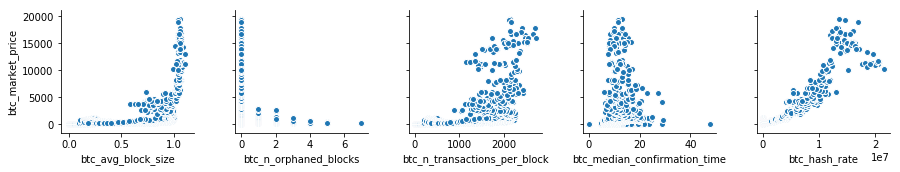

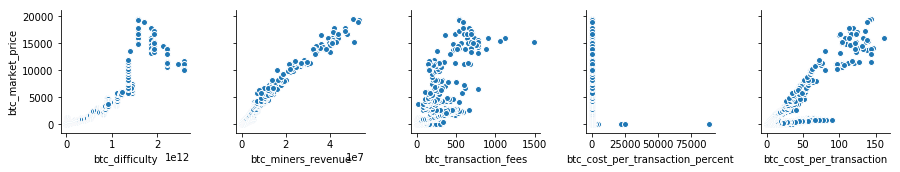

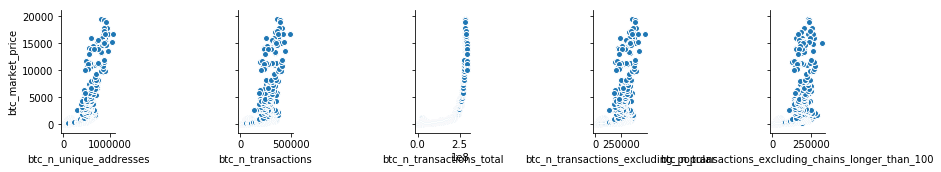

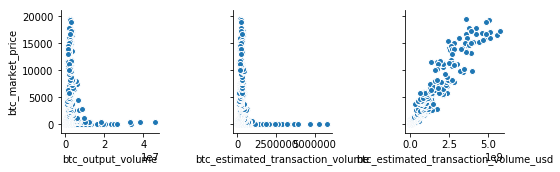

In [43]:
df_num_corr = df_num.corr()['btc_market_price'][:-1]
strong_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(strong_list), strong_list))

#Code for plotting the graphs.
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['btc_market_price'])

Now coming to the final task, we have to predict the future market value of Bitcoin. We create a sequential model using keras.models. Sequential model is just a stack of layers which can added easily to filter the values.
1. Before we get started, let’s first import all of the functions and classes we intend to use.
2. It is a good idea to fix the random number seed to ensure our results are reproducible.

In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tqdm import trange

numpy.random.seed(7)

3. We can also use the code from the previous section to load the dataset as a Pandas dataframe.We can then extract the NumPy array from the dataframe and convert the integer values to floating point values which are more suitable for modeling with a neural network.
4. Now we can define a function to create a new dataset as described above.The function takes two arguments, the dataset which is a NumPy array that we want to convert into a dataset and the look_back which is the number of previous time steps to use as input variables to predict the next time period, in this case, defaulted to 1.

In [ ]:
def load_dataset(datasource: str) -> (numpy.ndarray, MinMaxScaler):
    dataframe = pandas.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv', usecols=[1])
    dataframe = dataframe.fillna(method='pad')
    dataset = dataframe.values
    dataset = dataset.astype('float32')

    plt.plot(dataset)
    plt.show()

    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    return dataset, scaler
def create_dataset(dataset: numpy.ndarray, look_back: int=1) -> (numpy.ndarray, numpy.ndarray):
    data_x, data_y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        data_x.append(a)
        data_y.append(dataset[i + look_back, 0])
    return numpy.array(data_x), numpy.array(data_y)

In [ ]:
1. Split the dataset into training and testing sets.
2. Build the model.

In [ ]:
def split_dataset(dataset: numpy.ndarray, train_size, look_back) -> (numpy.ndarray, numpy.ndarray):
     if not train_size > look_back:
        raise ValueError('train_size must be lager than look_back')
     train, test = dataset[0:train_size, :], dataset[train_size - look_back:len(dataset), :]
     print('train_dataset: {}, test_dataset: {}'.format(len(train), len(test)))
     return train, test

def build_model(look_back: int, batch_size: int=1) -> Sequential:
    model = Sequential()
    model.add(LSTM(64,
                   activation='relu',
                   batch_input_shape=(batch_size, look_back, 1),
                   stateful=True,
                   return_sequences=False))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
def plot_data(dataset: numpy.ndarray,
              look_back: int,
              train_predict: numpy.ndarray,
              test_predict: numpy.ndarray,
              forecast_predict: numpy.ndarray):
    
    plt.plot(dataset)
    plt.plot([None for _ in range(look_back)] +
             [x for x in train_predict])
    plt.plot([None for _ in range(look_back)] +
             [None for _ in train_predict] +
             [x for x in test_predict])
    plt.plot([None for _ in range(look_back)] +
             [None for _ in train_predict] +
             [None for _ in test_predict] +
             [x for x in forecast_predict])
    plt.show()

In [ ]:
def split_dataset(dataset: numpy.ndarray, train_size, look_back) -> (numpy.ndarray, numpy.ndarray):
     if not train_size > look_back:
        raise ValueError('train_size must be lager than look_back')
     train, test = dataset[0:train_size, :], dataset[train_size - look_back:len(dataset), :]
     print('train_dataset: {}, test_dataset: {}'.format(len(train), len(test)))
     return train, test

def build_model(look_back: int, batch_size: int=1) -> Sequential:
    model = Sequential()
    model.add(LSTM(64,
                   activation='relu',
                   batch_input_shape=(batch_size, look_back, 1),
                   stateful=True,
                   return_sequences=False))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
def plot_data(dataset: numpy.ndarray,
              look_back: int,
              train_predict: numpy.ndarray,
              test_predict: numpy.ndarray,
              forecast_predict: numpy.ndarray):
    
    plt.plot(dataset)
    plt.plot([None for _ in range(look_back)] +
             [x for x in train_predict])
    plt.plot([None for _ in range(look_back)] +
             [None for _ in train_predict] +
             [x for x in test_predict])
    plt.plot([None for _ in range(look_back)] +
             [None for _ in train_predict] +
             [None for _ in test_predict] +
             [x for x in forecast_predict])
    plt.show()

Forecasting.

In [46]:
def make_forecast(model: Sequential, look_back_buffer: numpy.ndarray, timesteps: int=1, batch_size: int=1):
    forecast_predict = numpy.empty((0, 1), dtype=numpy.float32)
    for _ in trange(timesteps, desc='predicting data\t', mininterval=1.0):
        # make prediction with current lookback buffer
        cur_predict = model.predict(look_back_buffer, batch_size)
        # add prediction to result
        forecast_predict = numpy.concatenate([forecast_predict, cur_predict], axis=0)
        # add new axis to prediction to make it suitable as input
        cur_predict = numpy.reshape(cur_predict, (cur_predict.shape[1], cur_predict.shape[0], 1))
        # remove oldest prediction from buffer
        look_back_buffer = numpy.delete(look_back_buffer, 0, axis=1)
        # concat buffer with newest prediction
        look_back_buffer = numpy.concatenate([look_back_buffer, cur_predict], axis=1)
    return forecast_predict

def main():
    datasource = 'https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv'
    dataset, scaler = load_dataset(datasource)

    # split into train and test sets
    look_back = int(len(dataset) * 0.20)
    train_size = int(len(dataset) * 0.70)
    train, test = split_dataset(dataset, train_size, look_back)

    # reshape into X=t and Y=t+1
    train_x, train_y = create_dataset(train, look_back)
    test_x, test_y = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    train_x = numpy.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = numpy.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

    # create and fit Multilayer Perceptron model
    batch_size = 1
    model = build_model(look_back, batch_size=batch_size)
    for _ in trange(100, desc='fitting model\t', mininterval=1.0):
        model.fit(train_x, train_y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()

    # generate predictions for training
    train_predict = model.predict(train_x, batch_size)
    test_predict = model.predict(test_x, batch_size)

    # generate forecast predictions
    forecast_predict = make_forecast(model, test_x[-1::], timesteps=100, batch_size=batch_size)

    # invert dataset and predictions
    dataset = scaler.inverse_transform(dataset)
    train_predict = scaler.inverse_transform(train_predict)
    train_y = scaler.inverse_transform([train_y])
    test_predict = scaler.inverse_transform(test_predict)
    test_y = scaler.inverse_transform([test_y])
    forecast_predict = scaler.inverse_transform(forecast_predict)

    # calculate root mean squared error
    train_score = numpy.sqrt(mean_squared_error(train_y[0], train_predict[:, 0]))
    print('Train Score: %.2f RMSE' % train_score)
    test_score = numpy.sqrt(mean_squared_error(test_y[0], test_predict[:, 0]))
    print('Test Score: %.2f RMSE' % test_score)

    plot_data(dataset, look_back, train_predict, test_predict, forecast_predict)

if __name__ == '__main__':
    main()

NameError: name 'Sequential' is not defined